In [25]:
# this is to view the notebook in full with on my screen

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [30]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 50


In [31]:
data=pd.read_csv("/home/gaio/Documents/GitHub/iod-linux/DATA/marketing_campaign.csv",sep=";")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [8]:
# rename the columns
data.rename(columns = {'Year_Birth': 'YearBirth',
                       'Marital_Status': 'MaritalStatus', 
                       'Dt_Customer': 'DtCustomer', 
                       'Z_CostContact': 'ZCostContact',
                       'Z_Revenue': 'ZRevenue', 
                       'Kidhome': 'KidHome',
                       'Teenhome': 'TeenHome'}, inplace = True)
data.head()

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,ZCostContact,ZRevenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# check the null data
data.isnull().sum()

ID                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
KidHome                 0
TeenHome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
ZCostContact            0
ZRevenue                0
Response                0
dtype: int64

In [10]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Education average.
unique_Education = pd.unique(data.Education)

# find Income averages in Education specific
# Equalize the average Income values to the missing values in Income specific to Education
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ['Income'] # it can be add more column
for c in unique_Education:
    
    # create Education filter
    Education_filtre = temp_data.Education == c
    # filter data by Education
    filtered_data = temp_data[Education_filtre]
    
    # find average for Income in specific to Education
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Education
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Education:{c}")
        else: # find average for all data if no average in specific to Education
            all_data_mean = np.round(np.mean(data[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in Income to data temporary            
    temp_data[Education_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in Income column fill with 52720.37 when Education:Graduation
Missing Value in Income column fill with 56145.31 when Education:PhD
Missing Value in Income column fill with 52917.53 when Education:Master
Missing Value in Income column fill with 20306.26 when Education:Basic
Missing Value in Income column fill with 47633.19 when Education:2n Cycle


This code will fill the null values in the 'Income' column with the average specific to the 'Education' column in the data. The code first creates a filter for each unique value of the 'Education' column and filters the data accordingly. Then it calculates the average of the 'Income' column for each filtered data and fills the null values in that column with the calculated average. If no average is found for a specific 'Education' value, it will fill the null values with the overall average of the 'Income' column. Finally, it will synchronize the filled data with missing values to the main data.

It is important to note that the columns that are to be filled and the grouping column (in this case 'Income' and 'Education' respectively) can be changed as needed. Also, it prints out the filled values for each filtering so that the user can check whether the filled values are correct or not.

In [11]:


# check null data
data.isnull().sum()



ID                     0
YearBirth              0
Education              0
MaritalStatus          0
Income                 0
KidHome                0
TeenHome               0
DtCustomer             0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
ZCostContact           0
ZRevenue               0
Response               0
dtype: int64

In [12]:


# creating Year, Month, Age column for further analysis
from datetime import datetime as dt

# convert the 'Date' column to datetime format
data['DtCustomer']= pd.to_datetime(data['DtCustomer'])

# create Year, Month, Day columns
data['Year'] = data["DtCustomer"].dt.year
data['Month'] = data["DtCustomer"].dt.month

#create Age column 
age = []
for i in data["YearBirth"]:
    if i <= 1959:
        age.append("Elderly")
    elif i > 1959 and i <=1977:
        age.append("MiddleAge")
    else:
        age.append("Young")
data["Age"] = age

# drop original date column and other unnecessary columns
data.drop(['DtCustomer', 'ID', 'ZCostContact', 'ZRevenue'], axis=1, inplace=True)



In [14]:


# statistical information about numerical data
data.drop(["AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", "AcceptedCmp1",
           "AcceptedCmp2", "Complain", "Response", "Year", "Month"], axis=1).describe()



# information about data
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearBirth            2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   MaritalStatus        2240 non-null   object 
 3   Income               2240 non-null   float64
 4   KidHome              2240 non-null   int64  
 5   TeenHome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [15]:
data.head()

,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Age
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,2012,9,Elderly
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,2014,3,Elderly
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,2013,8,MiddleAge
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,2014,2,Young
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,2014,1,Young


In [16]:
# statistical information about categorical data
data[["Education", "MaritalStatus"]].describe()

,Education,MaritalStatus
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


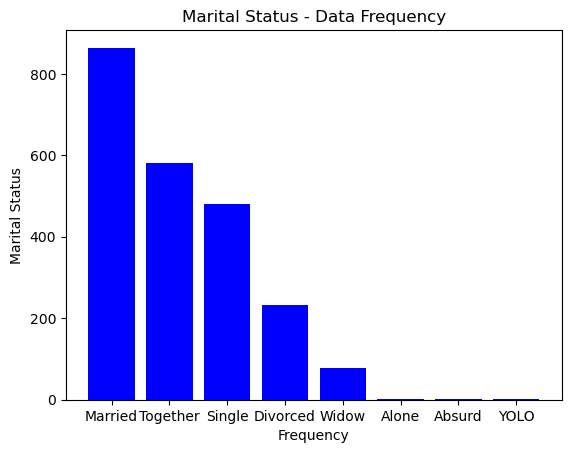

Number of Samples According to Marital Status 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: MaritalStatus, dtype: int64


In [17]:
# Number of sample according to MaritalStatus
plt.figure()
plt.bar(data["MaritalStatus"].value_counts().index, data["MaritalStatus"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Marital Status")
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of Samples According to Marital Status \n{data['MaritalStatus'].value_counts()}")

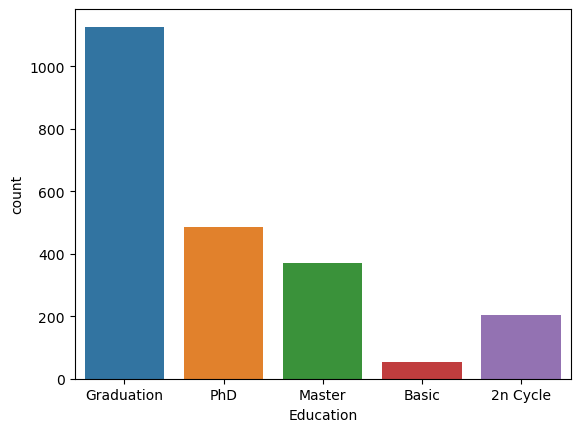

Number of samples According to Education 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [18]:


# Number of samples according to Education
sns.countplot(x="Education", data=data)
plt.xticks(rotation = 0)
plt.show()
print(f"Number of samples According to Education \n{data['Education'].value_counts()}")



In [19]:
# pivot table for see maritalstatus according to education
df = data[["Education", 'MaritalStatus']].value_counts().groupby(["Education", "MaritalStatus"]).sum().reset_index().sort_values(by=['Education','MaritalStatus'], ascending=False)
df = (df.pivot(index='Education', columns='MaritalStatus', values=0))
df


MaritalStatus,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,23.0,81.0,37.0,57.0,5.0,NaN
Basic,NaN,NaN,1.0,20.0,18.0,14.0,1.0,NaN
Graduation,1.0,1.0,119.0,433.0,252.0,286.0,35.0,NaN
Master,1.0,1.0,37.0,138.0,75.0,106.0,12.0,NaN
PhD,NaN,1.0,52.0,192.0,98.0,117.0,24.0,2.0


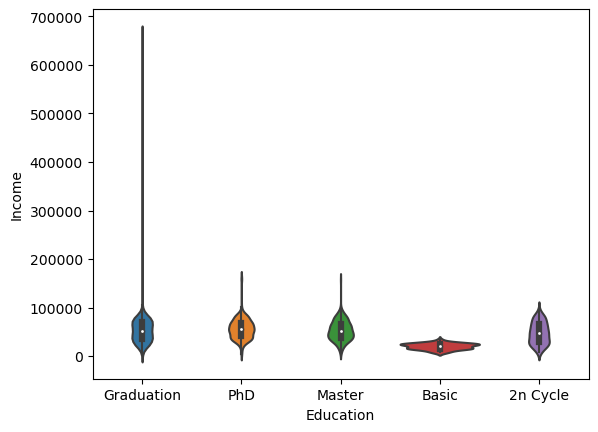

In [20]:


sns.violinplot(x="Education", y="Income", data=data)
plt.show()



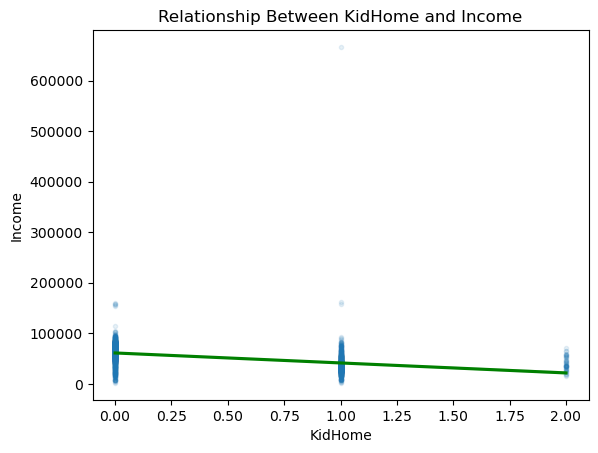

In [21]:


sns.regplot(x='KidHome', y='Income', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship Between KidHome and Income')
plt.show()



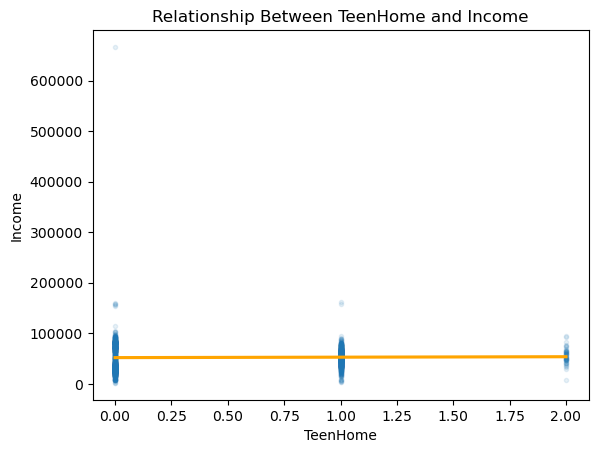

In [22]:
sns.regplot(x='TeenHome', y='Income', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between TeenHome and Income')
plt.show()

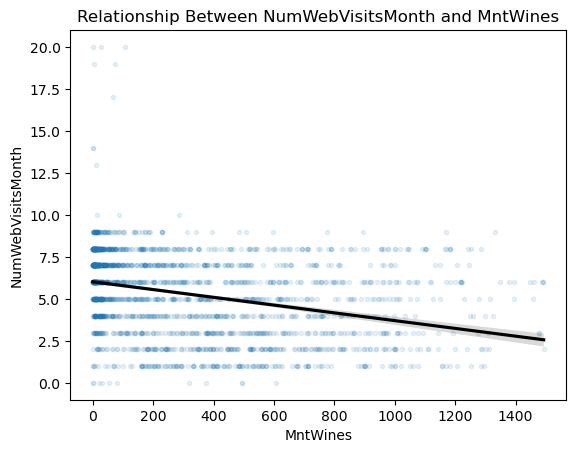

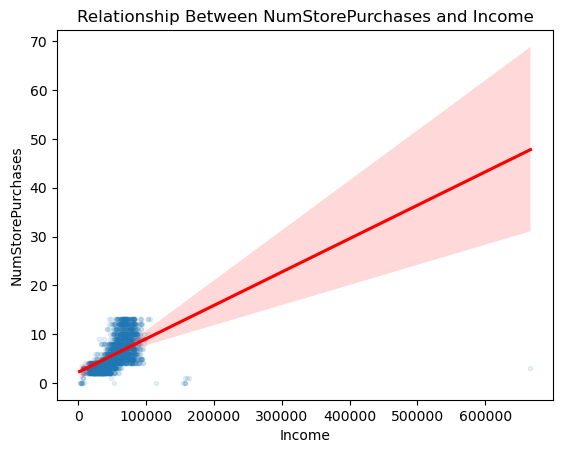


Campaign Analysis


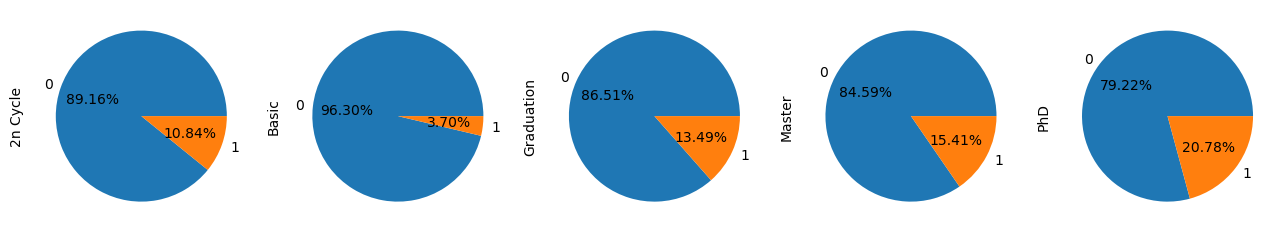

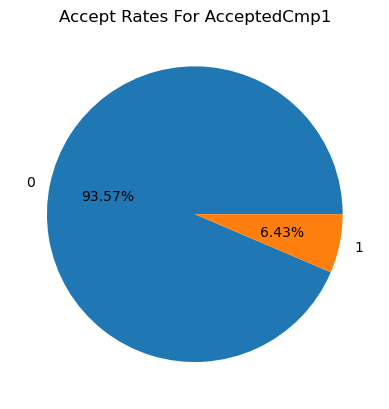

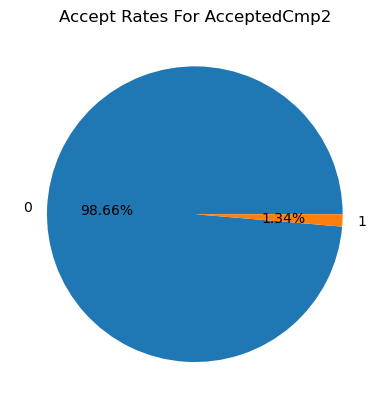

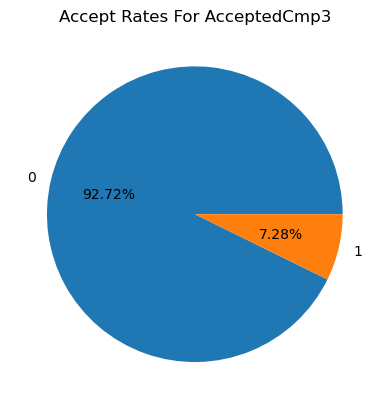

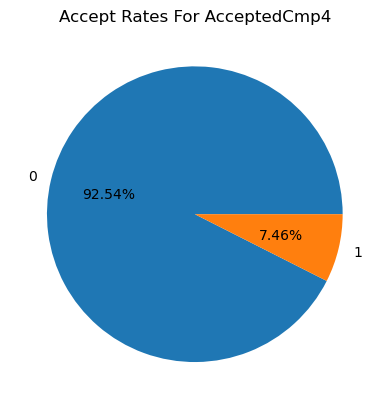

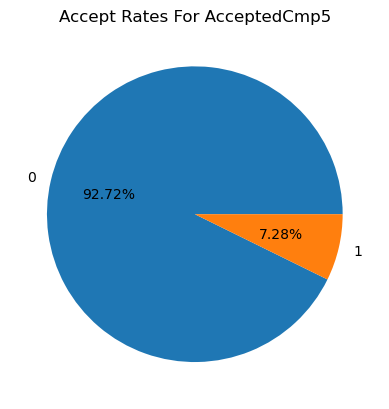

KeyError: "['MaritalStatus'] not in index"